# Survival Analysis

In [ ]:
# https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e

In [ ]:
# imports 
from IPython.core.interactiveshell import InteractiveShell
from io import StringIO

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from random import sample 

import dask.dataframe as dd
import functools
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

### Example: toy data

In [ ]:
from lifelines import KaplanMeierFitter

## Example Data 
durations =      [28, 29, 30, 30, 30, 30, 31, 23, 34, 52, 31 ,20]
event_observed = [0,   1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0]

## create an kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

In [ ]:
.6*.83

## Telco Example 

### Telco Customer Churn data from Kaggle
https://www.kaggle.com/blastchar/telco-customer-churn/

In [ ]:
##  create a dataframe
df = pd.read_csv("Telco-Customer-Churn.csv") 

In [ ]:
df.head() 

In [ ]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [ ]:
## Impute the null value with the median value

df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [ ]:
## Categorical Columns
cat_cols = [i  for i in df.columns if df[i].dtype == object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [ ]:
## Categories and their frequency counts.

for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

In [ ]:
## KaplanMeier curve, w/o breaking into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter

durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed, label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

## Kaplan Meier Curves for Cohorts

In [ ]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

In [ ]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['StreamingTV']   
i1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf1.plot(ax=a1)

## Cox Proportional Hazard Model (Survival Regression)

In [ ]:
from lifelines import CoxPHFitter     

In [ ]:


df_r= df.loc[: , ['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head() 


In [ ]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

In [ ]:
# Using Cox Proportional Hazards model

cph = CoxPHFitter()   ## Instantiate the class to create a cph object

cph.fit(df_dummy, 'tenure', event_col='Churn')   ## Fit the data to train the model

cph.print_summary()    ## HAve a look at the significance of the features

In [ ]:
# cph.plot()

In [ ]:
## Check all the methods and attributes associated with the cph object.
# dir(cph)

In [ ]:
## We want to see the Survival curve at the customer level. Therefore, we have selected 6 customers (rows 5 till 9).

tr_rows = df_dummy.iloc[5:10, :]
tr_rows

In [ ]:
## Lets predict the survival curve for the selected customers. 
## Customers can be identified with the help of the number mentioned against each curve.

cph.predict_survival_function(tr_rows).plot()

## Weibull

In [ ]:
# Weibull: random gen hist and pdf

a = 5. # shape
s = np.random.weibull(a, 1000)
# Display the histogram of the samples, along with the probability density function:


import matplotlib.pyplot as plt
x = np.arange(1,100.)/50.
def weib(x, n, a): 
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

count, bins, ignored = plt.hist(np.random.weibull(5.,1000))
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 1., 5.).max()
plt.plot(x, weib(x, 1., 5.)*scale)
plt.show()

In [ ]:
k = 5 # shape
l = 90 # scale

def weib(x, k, l): 
    return (k / l) * (x / l)**(k - 1) * np.exp(-(x / l)**k)

x = np.arange(1, 200)
plt.plot(x, weib(x, k, l))

gamma(1 + 1/k)
l * gamma(1 + 1/k)

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 163 total observations, 7 right-censored observations>

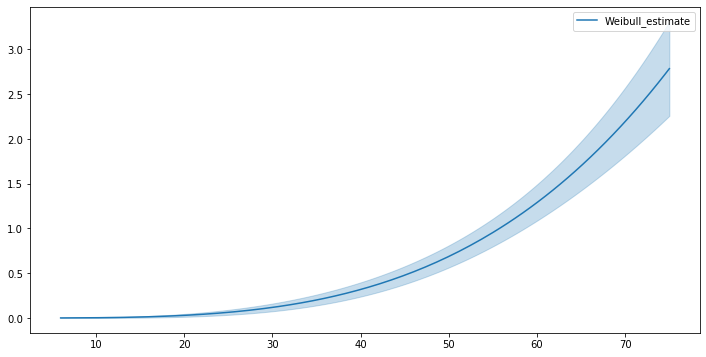

In [61]:
from lifelines import WeibullFitter
from lifelines.datasets import load_waltons

data = load_waltons()

data.head()
T = data['T']
E = data['E']

wf = WeibullFitter()
wf.fit(T, E)

wf.print_summary()
wf.plot()

# plt.plot(x, weib(x, k, l))

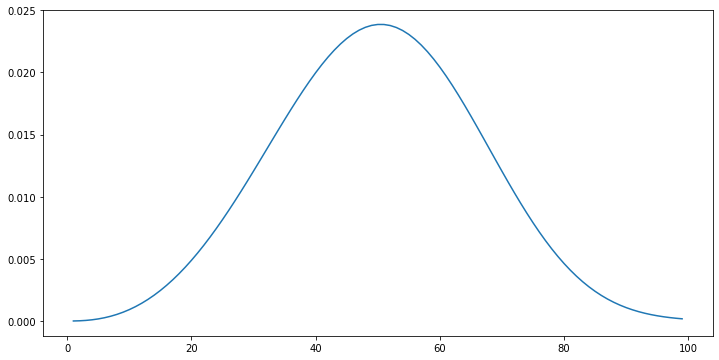

In [60]:
x = np.arange(1, 100)
plt.plot(x, weib(x, k = wf.rho_, l = wf.lambda_))